In [1]:
!pip install opencv-python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import math
plt.rcParams.update({
    "font.size": 15,
    "font.family": "Arial"
})
bxwidth = 1

In [3]:
df = pd.read_csv("D:/pml/handwritten/handwritten/english.csv")

In [4]:
df

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


In [5]:
image_folder = "D:/pml/handwritten/handwritten/Img/"
base_path = "D:/pml/handwritten/handwritten/"

In [6]:
df.columns = df.columns.str.strip()

In [7]:
print(df.describe())
print(df.info())

                     image label
count                 3410  3410
unique                3410    62
top     Img/img062-055.png     0
freq                     1    55
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3410 non-null   object
 1   label   3410 non-null   object
dtypes: object(2)
memory usage: 53.4+ KB
None


In [8]:
print(df.isnull().sum())

image    0
label    0
dtype: int64


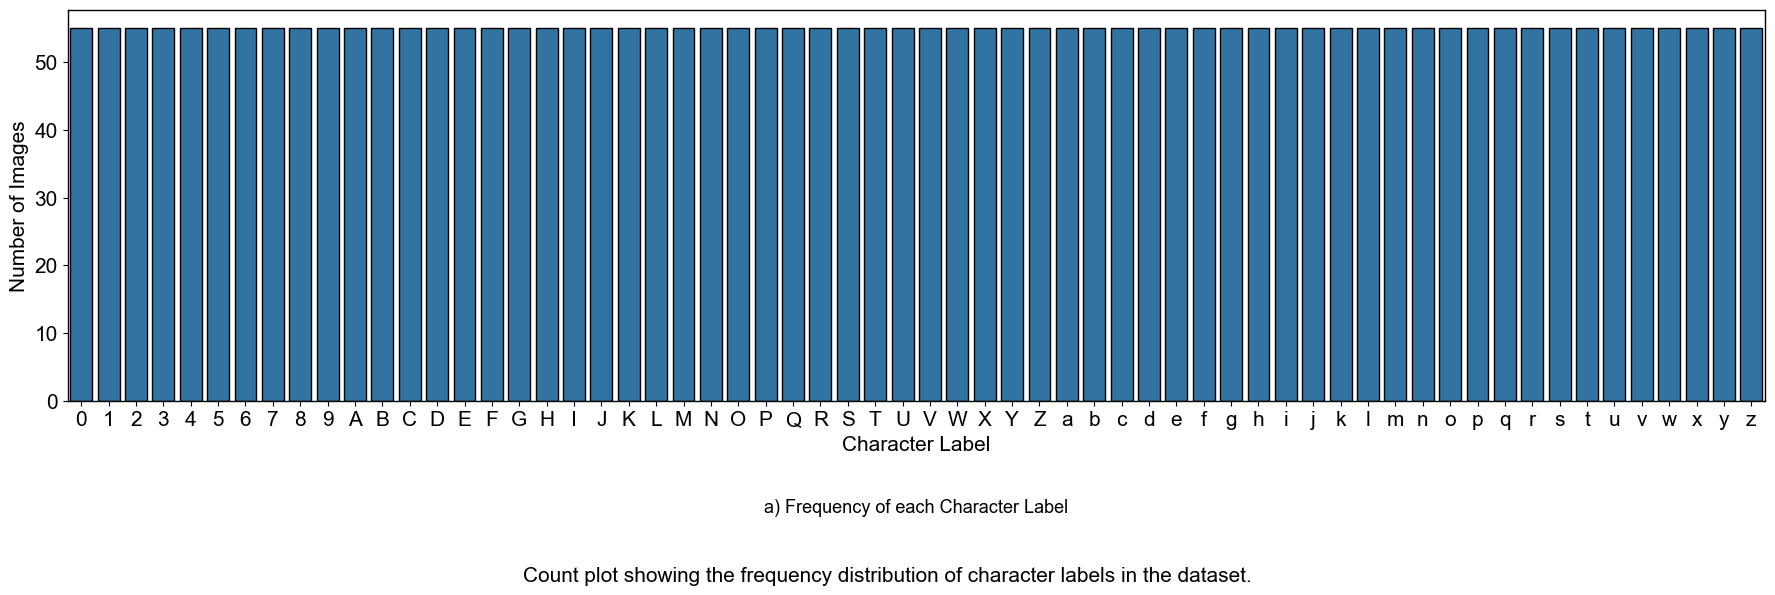

In [9]:
cat_cols = ['label']
rows = math.ceil(len(cat_cols) / 1) 

fig, axes = plt.subplots(rows, 1, figsize=(18, 6 * rows))
if rows == 1:
    axes = [axes]
else:
    axes = axes.flatten()

subplot_labels = [f"{chr(97+i)})" for i in range(len(cat_cols))]

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, order=sorted(df[col].unique()), ax=ax, edgecolor="black")
    
    ax.set_title("") # No title on top
    ax.set_xlabel("Character Label")
    ax.set_ylabel("Number of Images")
    
    ax.text(0.5, -0.25, f"{subplot_labels[i]} Frequency of each Character Label", 
            ha="center", va="top", transform=ax.transAxes, fontsize=13)

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

fig.text(0.5, 0.01, "Count plot showing the frequency distribution of character labels in the dataset.", 
         ha="center", fontsize=15)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("label_distribution_handwritten.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

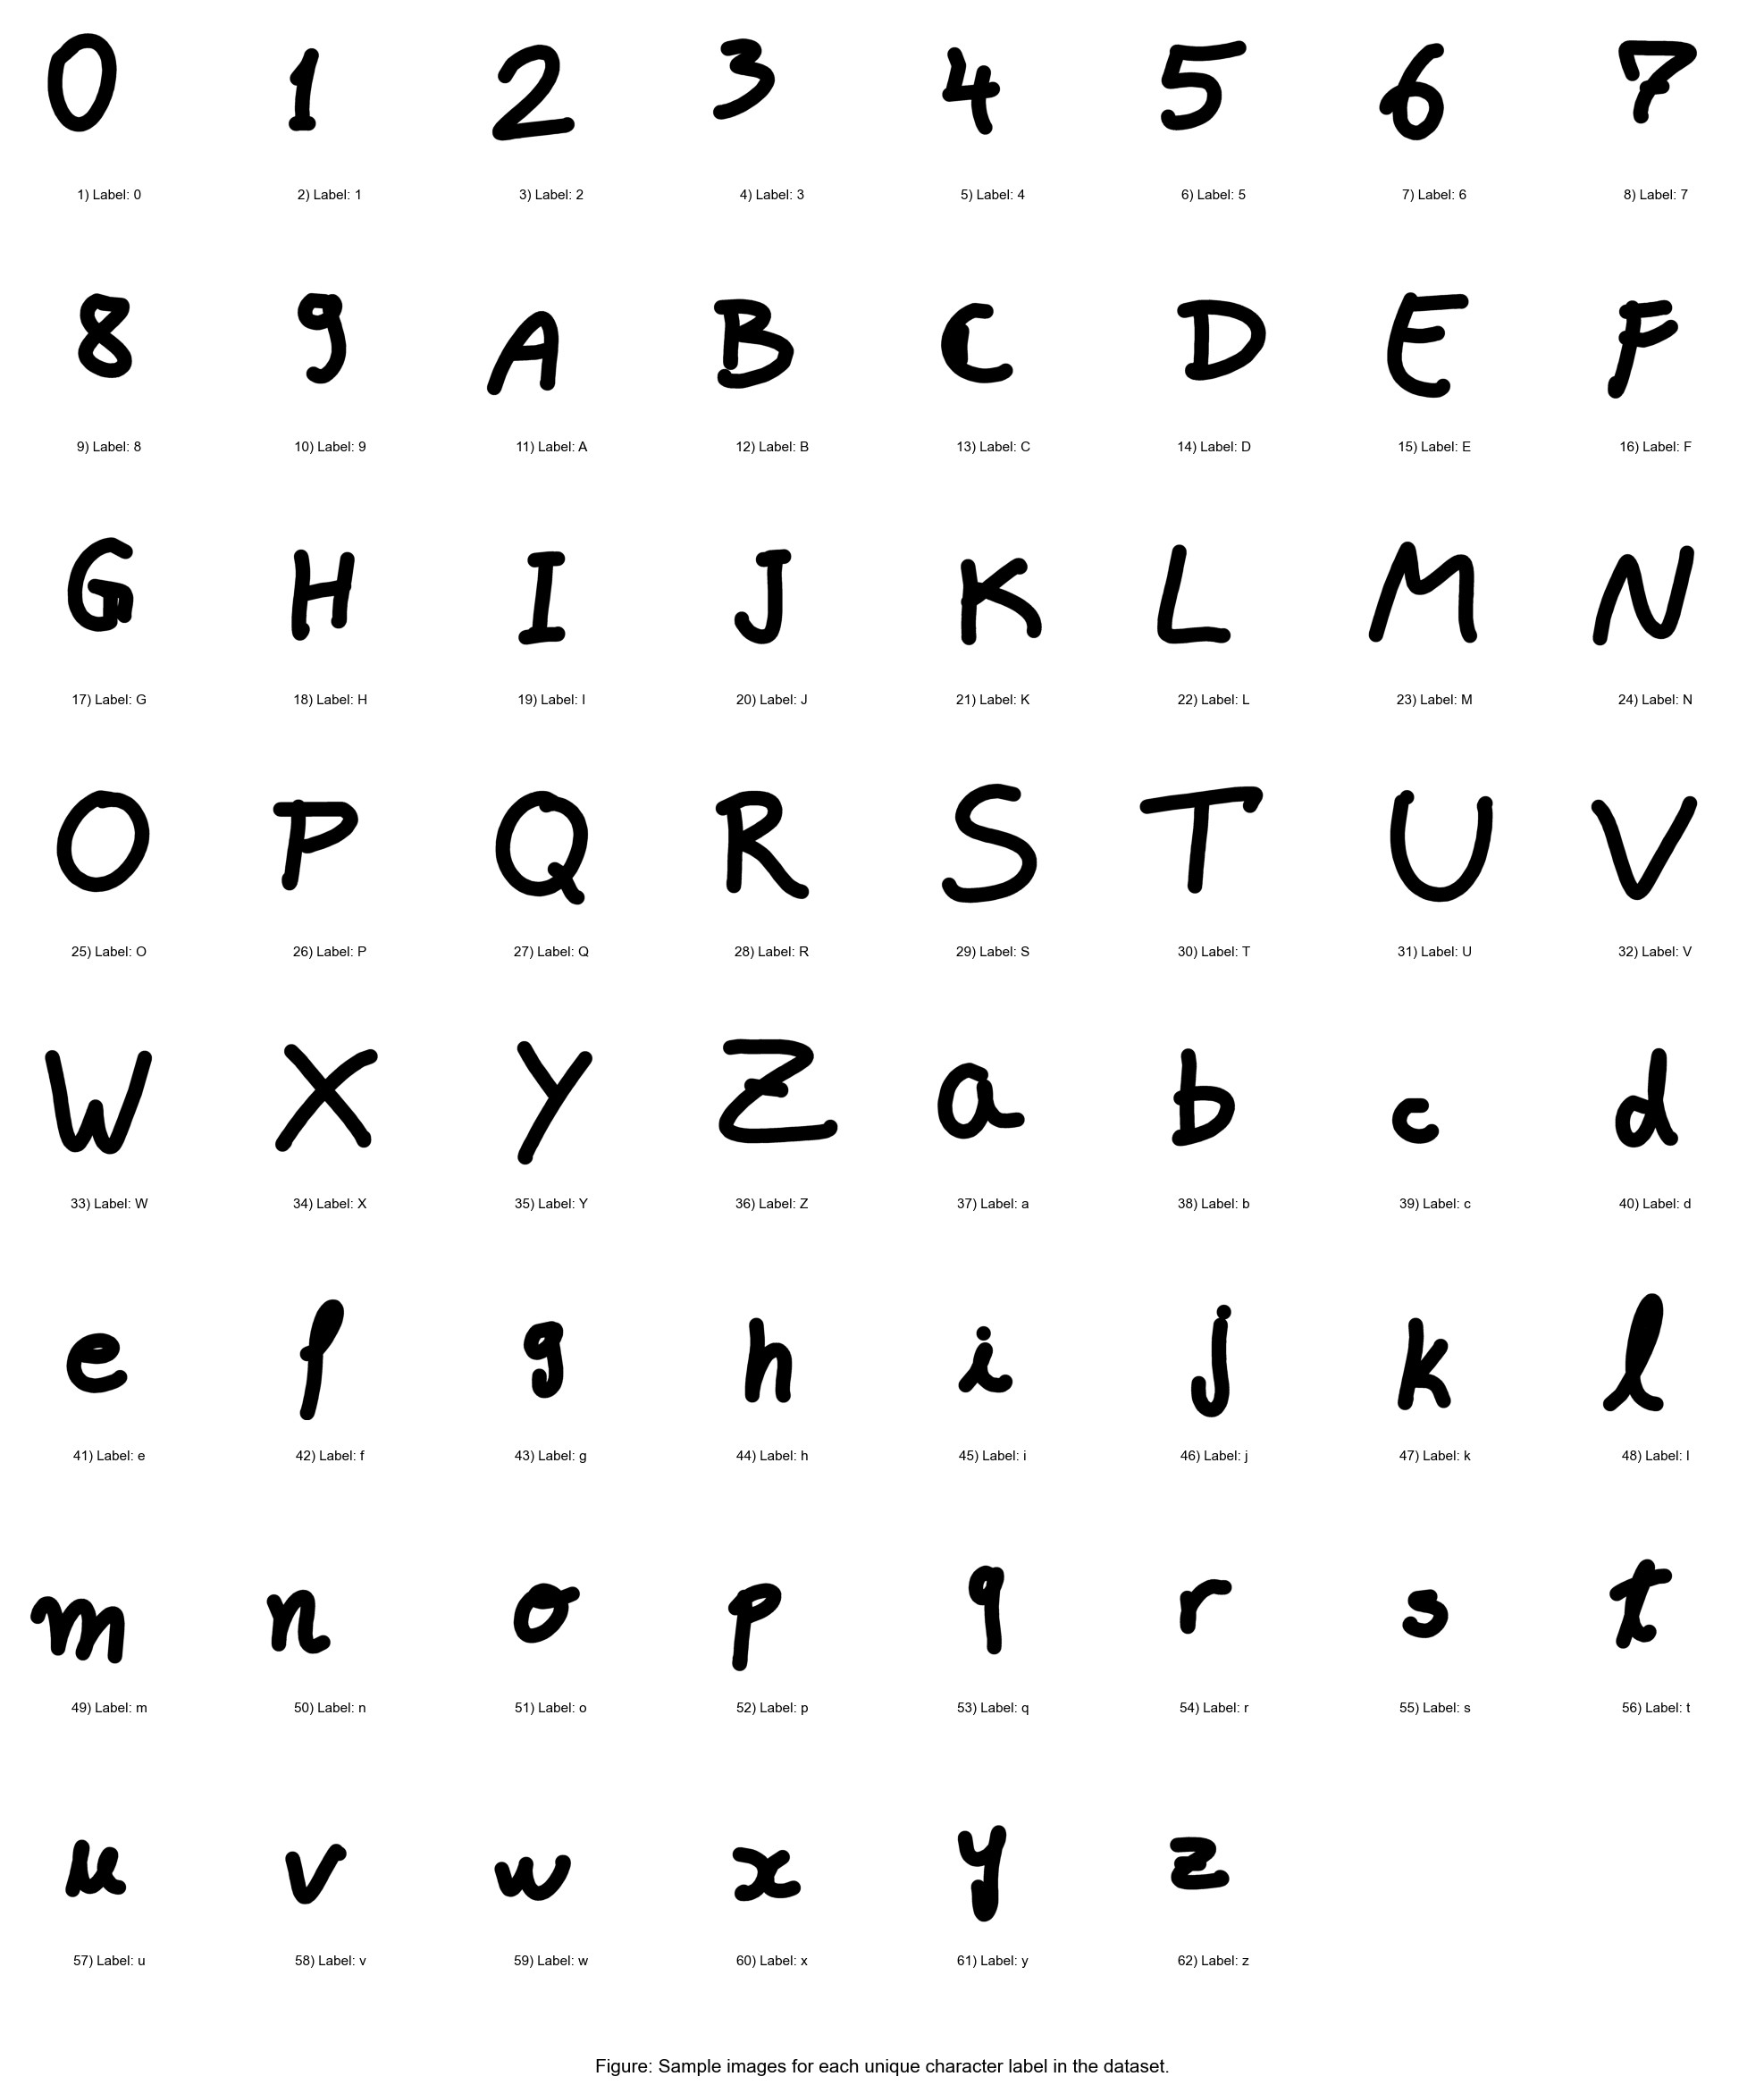

In [10]:
samples = df.groupby('label').first().reset_index()
num_labels = len(samples)
cols_per_row = 8 
rows_needed = math.ceil(num_labels / cols_per_row)

fig, axes = plt.subplots(rows_needed, cols_per_row, figsize=(20, 3 * rows_needed))
axes = axes.flatten()

subplot_labels = [f"{i+1})" for i in range(num_labels)]

for i, (idx, row) in enumerate(samples.iterrows()):
    ax = axes[i]
    img_relative_path = row['image']
    img_full_path = os.path.join(base_path, img_relative_path)
    
    if os.path.exists(img_full_path):
        image = cv2.imread(img_full_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image_rgb)
    else:
        ax.text(0.5, 0.5, "File Not Found", ha='center', va='center')
        
    ax.set_title("")
    ax.axis('off')

    ax.text(0.5, -0.20, f"{subplot_labels[i]} Label: {row['label']}", 
            ha="center", va="top", transform=ax.transAxes, fontsize=11)

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(0.5, 0.01, "Figure: Sample images for each unique character label in the dataset.", 
         ha="center", fontsize=15)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("sample_characters_grid.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

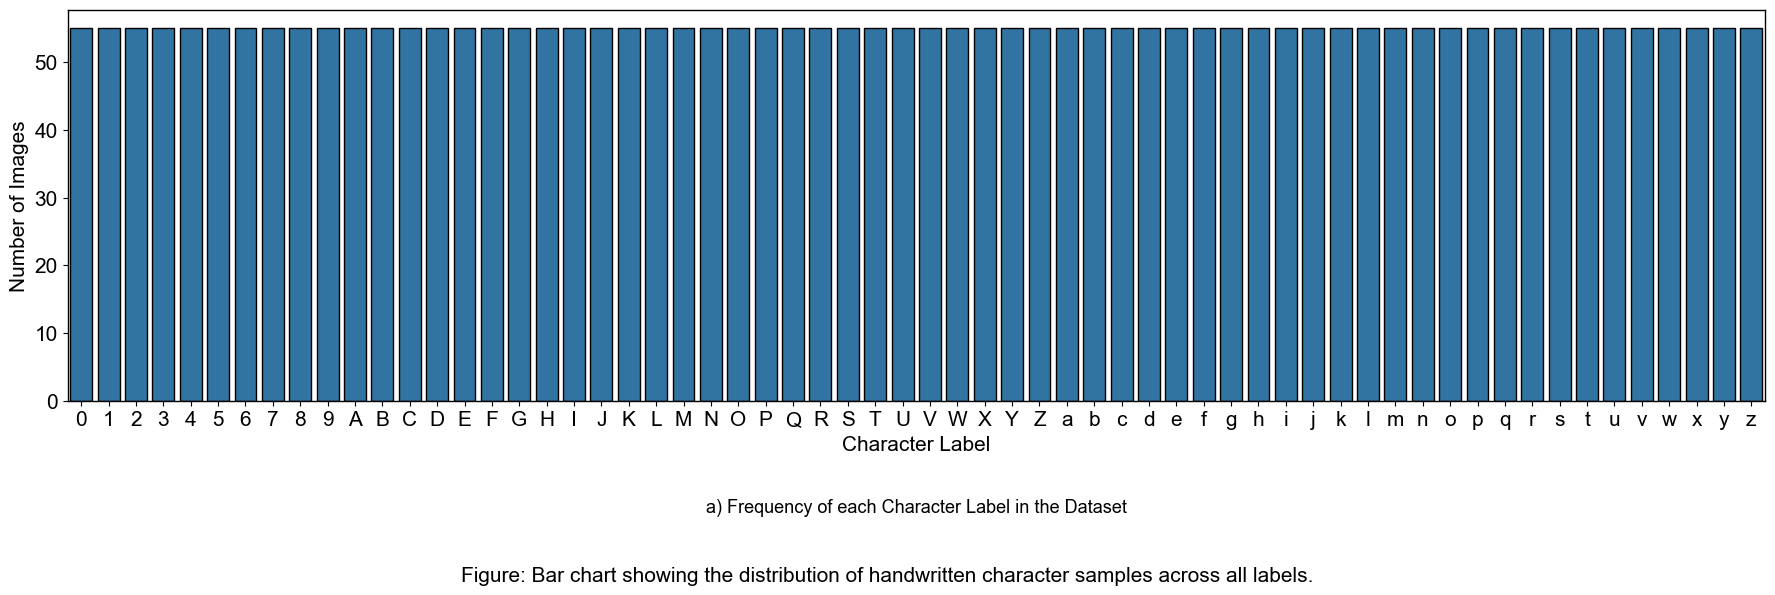

In [11]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot(data=df, x='label', order=sorted(df['label'].unique()), ax=ax, edgecolor="black")

ax.set_title("") 
ax.set_xlabel("Character Label")
ax.set_ylabel("Number of Images")

ax.text(
    0.5, -0.25,
    "a) Frequency of each Character Label in the Dataset",
    ha="center",
    va="top",
    transform=ax.transAxes,
    fontsize=13
)

for spine in ax.spines.values():
    spine.set_linewidth(bxwidth)

fig.text(
    0.5, 0.01,
    "Figure: Bar chart showing the distribution of handwritten character samples across all labels.",
    ha="center",
    fontsize=15
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig(
    "label_distribution_handwritten.eps",
    format="eps",
    dpi=600,
    bbox_inches="tight"
)
plt.show()